In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# 2330
df = pd.read_csv('2330.TW.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,69.649033,69.649033,68.475182,69.649033,35.597221,2.006623e+11
1,2000-01-05,69.649033,71.214043,68.866341,71.214043,36.397091,4.024668e+11
2,2000-01-06,70.822884,71.214043,69.649033,69.649033,35.597221,1.975457e+11
3,2000-01-07,67.301331,68.475182,66.518639,67.692490,34.597237,2.352703e+11
4,2000-01-10,69.649033,70.431351,68.475182,70.040192,35.797142,2.761717e+11
...,...,...,...,...,...,...,...
5720,2022-11-18,491.500000,494.000000,486.000000,487.000000,487.000000,3.585972e+07
5721,2022-11-21,487.500000,489.500000,480.500000,482.000000,482.000000,2.971018e+07
5722,2022-11-22,476.000000,491.000000,476.000000,491.000000,491.000000,3.734313e+07
5723,2022-11-23,494.500000,496.000000,488.500000,492.000000,492.000000,3.347534e+07


In [3]:
n = 120

In [4]:
df = df.loc[df['Date'] > '2008-10-01']
len(df)

3482

In [5]:
df['Volume'].fillna(0).astype('int')

2243    43619010
2244    56136285
2245    59422635
2246    48947520
2247    86231010
          ...   
5720    35859717
5721    29710180
5722    37343127
5723    33475337
5724    27396552
Name: Volume, Length: 3482, dtype: int64

In [6]:
df['Volume'].fillna(0).astype('int').apply(lambda x: x/1000)

2243    43619.010
2244    56136.285
2245    59422.635
2246    48947.520
2247    86231.010
          ...    
5720    35859.717
5721    29710.180
5722    37343.127
5723    33475.337
5724    27396.552
Name: Volume, Length: 3482, dtype: float64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_19381/2394721818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3482 entries, 2243 to 5724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3482 non-null   datetime64[ns]
 1   Open       3476 non-null   float64       
 2   High       3476 non-null   float64       
 3   Low        3476 non-null   float64       
 4   Close      3476 non-null   float64       
 5   Adj Close  3476 non-null   float64       
 6   Volume     3476 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 217.6 KB


<AxesSubplot: xlabel='Date'>

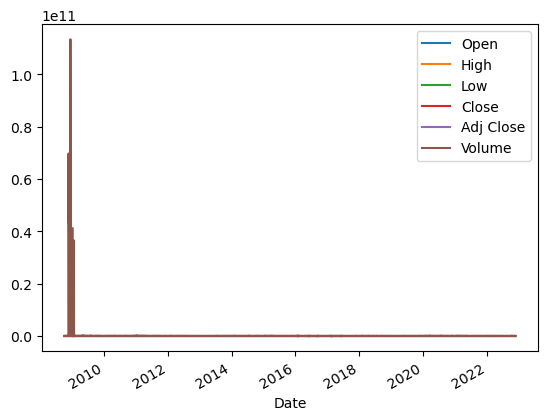

In [9]:
df.plot(x='Date')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

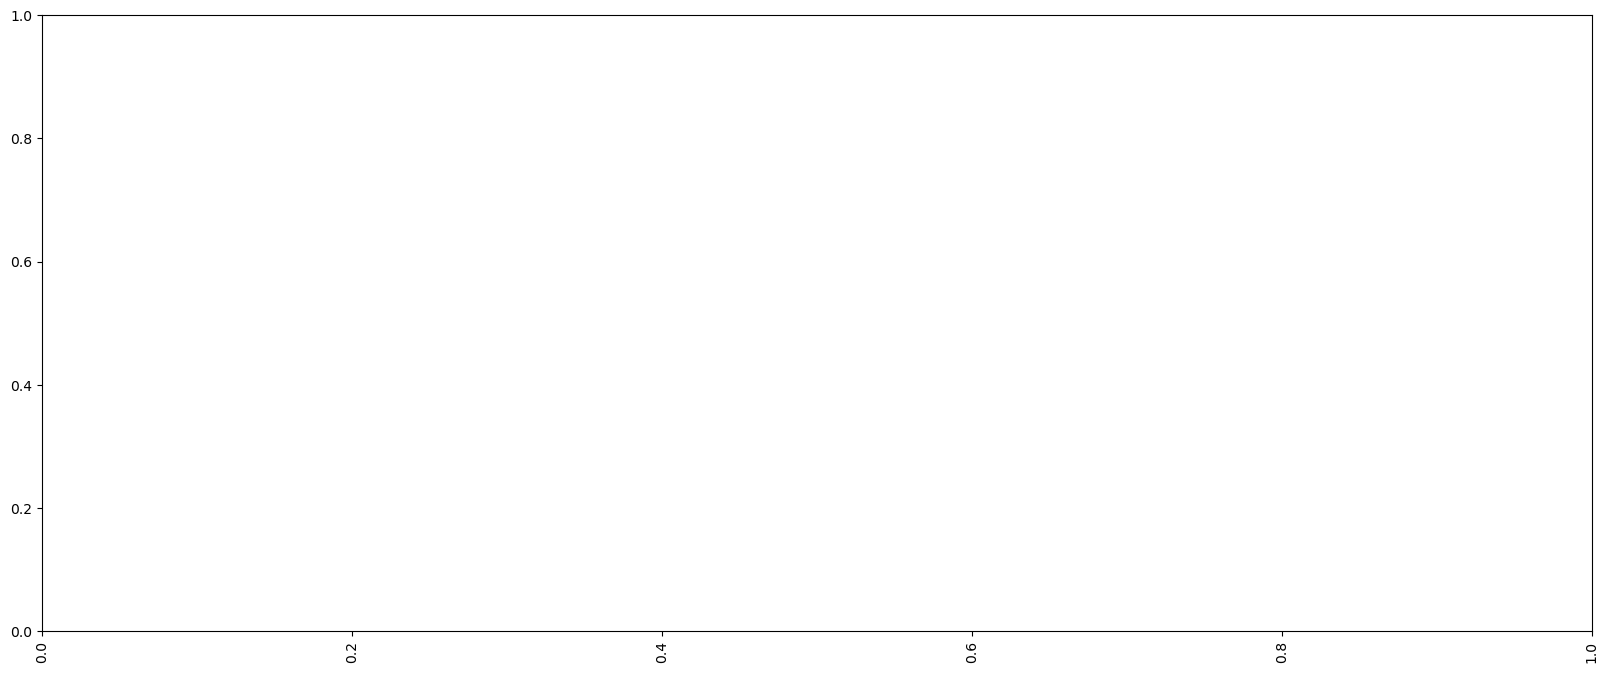

In [10]:
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

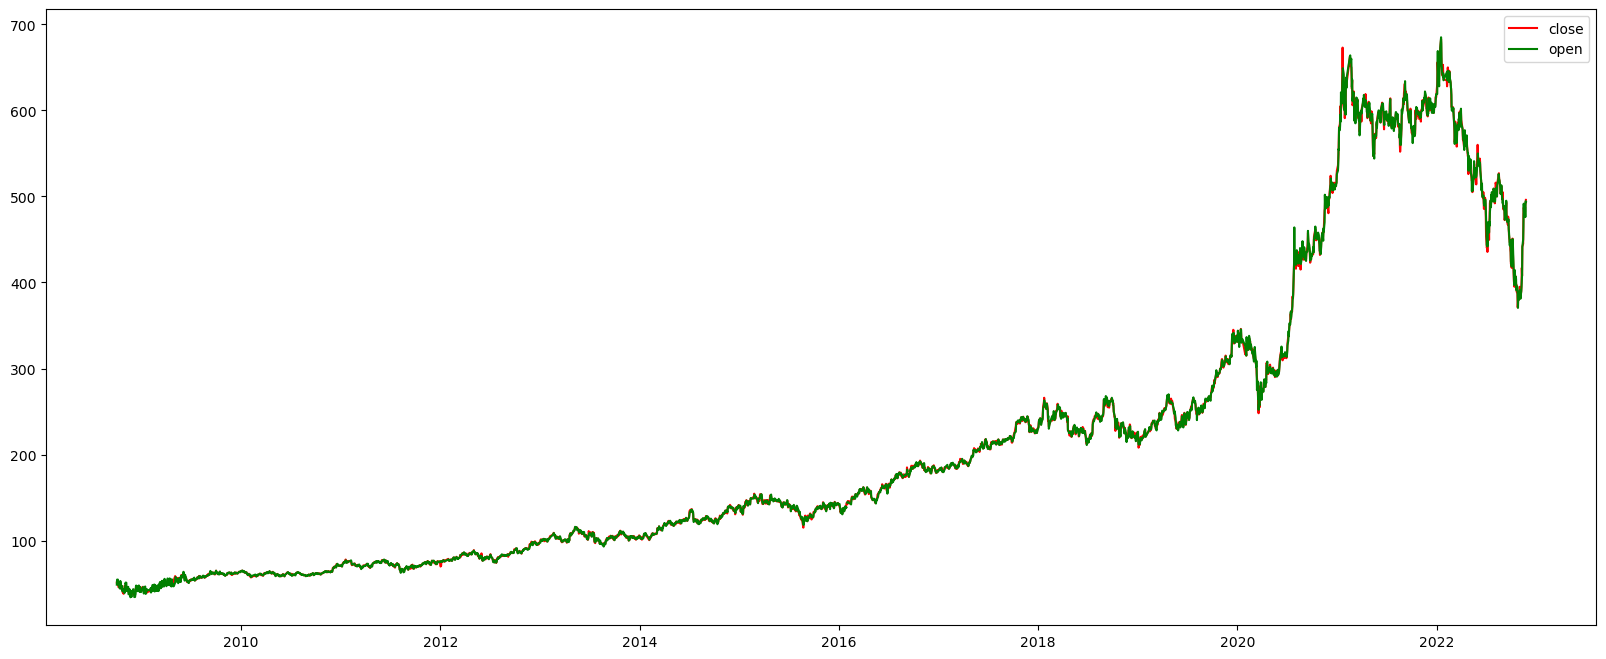

In [11]:
fig = plt.figure(figsize=(20,8))
# plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(df['Date'],df['Close'], color='red', label='close')
ax1.plot(df['Date'],df['Open'], color='green', label='open')
plt.legend()
#ax2 = ax1.twinx()
#plt.bar(df['Date'], df['Volume'].fillna(0).astype('int')//100000)
#ax3 = ax1.twinx()
plt.show()

In [12]:
total_cnt = len(df)
test_cnt = int(total_cnt*0.3)
test_cnt

1044

In [13]:
#test_data = df.loc[df['Date'] > '2020-10-01']
test_data = df[0:test_cnt]
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
2243,2008-10-02,48.756218,52.835819,48.606964,51.144279,31.612602,43619010.0
2244,2008-10-03,54.626865,54.626865,49.950249,51.144279,31.612602,56136285.0
2245,2008-10-06,54.626865,54.626865,48.756218,48.756218,30.136524,59422635.0
2246,2008-10-07,52.139301,52.139301,47.711441,49.452736,30.567041,48947520.0
2247,2008-10-08,49.452736,49.452736,46.019901,46.019901,28.445194,86231010.0
...,...,...,...,...,...,...,...
3282,2012-12-04,96.900002,97.199997,95.300003,96.599998,71.762344,41419000.0
3283,2012-12-05,94.599998,97.099998,94.599998,96.900002,71.985207,60447000.0
3284,2012-12-06,96.599998,96.900002,96.099998,96.599998,71.762344,33074000.0
3285,2012-12-07,97.099998,98.500000,97.099998,98.099998,72.876678,37005000.0


In [14]:
train_data = df[:len(df)-len(test_data)]
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
2243,2008-10-02,48.756218,52.835819,48.606964,51.144279,31.612602,43619010.0
2244,2008-10-03,54.626865,54.626865,49.950249,51.144279,31.612602,56136285.0
2245,2008-10-06,54.626865,54.626865,48.756218,48.756218,30.136524,59422635.0
2246,2008-10-07,52.139301,52.139301,47.711441,49.452736,30.567041,48947520.0
2247,2008-10-08,49.452736,49.452736,46.019901,46.019901,28.445194,86231010.0
...,...,...,...,...,...,...,...
4676,2018-08-09,247.000000,248.000000,246.000000,247.000000,221.494873,15128655.0
4677,2018-08-10,246.500000,247.000000,244.500000,245.000000,219.701401,15890492.0
4678,2018-08-13,241.500000,243.000000,239.000000,240.500000,215.666061,17881194.0
4679,2018-08-14,245.000000,245.000000,242.500000,243.500000,218.356277,17358913.0


In [15]:
# test_set = test_data['Open']
test_set = test_data['Close']
test_set

2243    51.144279
2244    51.144279
2245    48.756218
2246    49.452736
2247    46.019901
          ...    
3282    96.599998
3283    96.900002
3284    96.599998
3285    98.099998
3286    96.500000
Name: Close, Length: 1044, dtype: float64

In [16]:
# train_set = train_data['Open']
train_set = train_data['Close']
print(type(train_set))
print(len(train_set))
train_set

<class 'pandas.core.series.Series'>
2438


2243     51.144279
2244     51.144279
2245     48.756218
2246     49.452736
2247     46.019901
           ...    
4676    247.000000
4677    245.000000
4678    240.500000
4679    243.500000
4680    241.500000
Name: Close, Length: 2438, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
sc = MinMaxScaler(feature_range=(0,1))

In [19]:
train_set = train_set.values.reshape(-1,1)
print(len(train_set))
print(type(train_set))
train_set

2438
<class 'numpy.ndarray'>


array([[ 51.144279],
       [ 51.144279],
       [ 48.756218],
       ...,
       [240.5     ],
       [243.5     ],
       [241.5     ]])

In [20]:
train_set_sc = sc.fit_transform(train_set)
train_set_sc

array([[0.06333232],
       [0.06333232],
       [0.05292152],
       ...,
       [0.88883226],
       [0.90191081],
       [0.89319177]])

In [21]:
x_train = []
y_train = []

In [22]:
train_set_sc[0:19, 0]

array([0.06333232, 0.06333232, 0.05292152, 0.055958  , 0.04099249,
       0.04034182, 0.04272763, 0.05682557, 0.04945125, 0.04229383,
       0.03535331, 0.03209993, 0.03166615, 0.0251594 , 0.01886956,
       0.01279659, 0.00650673, 0.0125797 , 0.0225567 ])

In [23]:
train_set_sc[19,0]

0.03513641849516863

In [24]:
for i in range(n, len(train_set)):
    print(f'i={i}, i-n={i-n}, i-1={i-1}, size: {len(train_set_sc[i-n:i-1, 0])}')
    x_train.append(train_set_sc[i-n:i-1, 0])
    y_train.append(train_set_sc[i-1,0])
    # print(f'y={y_train}, x={x_train}')

i=120, i-n=0, i-1=119, size: 119
i=121, i-n=1, i-1=120, size: 119
i=122, i-n=2, i-1=121, size: 119
i=123, i-n=3, i-1=122, size: 119
i=124, i-n=4, i-1=123, size: 119
i=125, i-n=5, i-1=124, size: 119
i=126, i-n=6, i-1=125, size: 119
i=127, i-n=7, i-1=126, size: 119
i=128, i-n=8, i-1=127, size: 119
i=129, i-n=9, i-1=128, size: 119
i=130, i-n=10, i-1=129, size: 119
i=131, i-n=11, i-1=130, size: 119
i=132, i-n=12, i-1=131, size: 119
i=133, i-n=13, i-1=132, size: 119
i=134, i-n=14, i-1=133, size: 119
i=135, i-n=15, i-1=134, size: 119
i=136, i-n=16, i-1=135, size: 119
i=137, i-n=17, i-1=136, size: 119
i=138, i-n=18, i-1=137, size: 119
i=139, i-n=19, i-1=138, size: 119
i=140, i-n=20, i-1=139, size: 119
i=141, i-n=21, i-1=140, size: 119
i=142, i-n=22, i-1=141, size: 119
i=143, i-n=23, i-1=142, size: 119
i=144, i-n=24, i-1=143, size: 119
i=145, i-n=25, i-1=144, size: 119
i=146, i-n=26, i-1=145, size: 119
i=147, i-n=27, i-1=146, size: 119
i=148, i-n=28, i-1=147, size: 119
i=149, i-n=29, i-1=148, 

In [25]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
print(len(x_train))
x_train

2318


array([[0.06333232, 0.06333232, 0.05292152, ..., 0.06463367, 0.06550123,
        0.06593502],
       [0.06333232, 0.05292152, 0.055958  , ..., 0.06550123, 0.06593502,
        0.06333232],
       [0.05292152, 0.055958  , 0.04099249, ..., 0.06593502, 0.06333232,
        0.06767013],
       ...,
       [0.88011322, 0.8539561 , 0.87139418, ..., 0.89319177, 0.91934889,
        0.91716913],
       [0.8539561 , 0.87139418, 0.89755129, ..., 0.91934889, 0.91716913,
        0.90845009],
       [0.87139418, 0.89755129, 0.88447274, ..., 0.91716913, 0.90845009,
        0.88883226]])

In [27]:
y_train

array([0.06333232, 0.06767013, 0.0685377 , ..., 0.90845009, 0.88883226,
       0.90191081])

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.06333232],
        [0.06333232],
        [0.05292152],
        ...,
        [0.06463367],
        [0.06550123],
        [0.06593502]],

       [[0.06333232],
        [0.05292152],
        [0.055958  ],
        ...,
        [0.06550123],
        [0.06593502],
        [0.06333232]],

       [[0.05292152],
        [0.055958  ],
        [0.04099249],
        ...,
        [0.06593502],
        [0.06333232],
        [0.06767013]],

       ...,

       [[0.88011322],
        [0.8539561 ],
        [0.87139418],
        ...,
        [0.89319177],
        [0.91934889],
        [0.91716913]],

       [[0.8539561 ],
        [0.87139418],
        [0.89755129],
        ...,
        [0.91934889],
        [0.91716913],
        [0.90845009]],

       [[0.87139418],
        [0.89755129],
        [0.88447274],
        ...,
        [0.91716913],
        [0.90845009],
        [0.88883226]]])

In [29]:
x_train[0]

array([[0.06333232],
       [0.06333232],
       [0.05292152],
       [0.055958  ],
       [0.04099249],
       [0.04034182],
       [0.04272763],
       [0.05682557],
       [0.04945125],
       [0.04229383],
       [0.03535331],
       [0.03209993],
       [0.03166615],
       [0.0251594 ],
       [0.01886956],
       [0.01279659],
       [0.00650673],
       [0.0125797 ],
       [0.0225567 ],
       [0.03513642],
       [0.04858368],
       [0.04424587],
       [0.04858368],
       [0.04858368],
       [0.03405196],
       [0.02906345],
       [0.0277621 ],
       [0.02732832],
       [0.02862967],
       [0.01604997],
       [0.02125536],
       [0.01735131],
       [0.0073743 ],
       [0.00520538],
       [0.        ],
       [0.0073743 ],
       [0.0021689 ],
       [0.01344726],
       [0.00954321],
       [0.0177851 ],
       [0.01735131],
       [0.01735131],
       [0.00498849],
       [0.00151824],
       [0.00108444],
       [0.00173511],
       [0.01301348],
       [0.017

In [30]:
y_train[0]

0.06333231644637019

### modeling

In [31]:
import tensorflow as tf

2023-05-05 18:15:25.653804: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-05 18:15:25.748793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-05 18:15:25.748828: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=500, input_shape=(x_train.shape[1], 1) ) )

2023-05-05 18:15:29.465658: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 18:15:29.466111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-05 18:15:29.466169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-05-05 18:15:29.466208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-05-05 18:15:29.466286: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [33]:
model.add(tf.keras.layers.Dense(units=1))

In [34]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500)               1004000   
                                                                 
 dense (Dense)               (None, 1)                 501       
                                                                 
Total params: 1,004,501
Trainable params: 1,004,501
Non-trainable params: 0
_________________________________________________________________


In [36]:
mymodel = model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
145/145 [==============================] - 24s 147ms/step - loss: nan
Epoch 2/100
145/145 [==============================] - 22s 150ms/step - loss: nan
Epoch 3/100
145/145 [==============================] - 20s 136ms/step - loss: nan
Epoch 4/100
145/145 [==============================] - 26s 178ms/step - loss: nan
Epoch 5/100
145/145 [==============================] - 22s 150ms/step - loss: nan
Epoch 6/100
145/145 [==============================] - 21s 148ms/step - loss: nan
Epoch 7/100
145/145 [==============================] - 23s 156ms/step - loss: nan
Epoch 8/100
145/145 [==============================] - 20s 135ms/step - loss: nan
Epoch 9/100
145/145 [==============================] - 19s 131ms/step - loss: nan
Epoch 10/100
145/145 [==============================] - 19s 132ms/step - loss: nan
Epoch 11/100
145/145 [==============================] - 19s 132ms/step - loss: nan
Epoch 12/100
145/145 [==============================] - 19s 132ms/step - loss: nan
Epoch 13/100


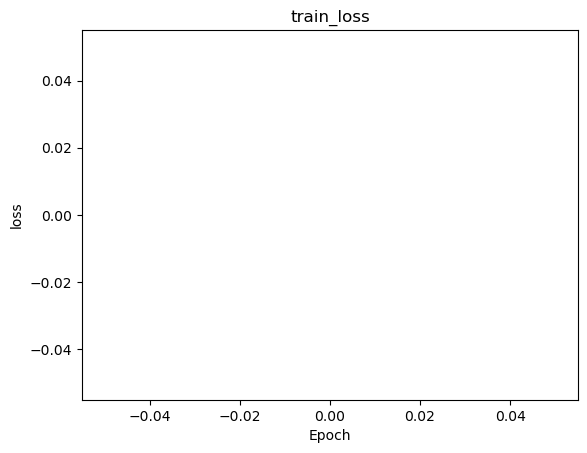

In [37]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(mymodel.history['loss'])

In [38]:
mymodel.history

{'loss': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan]}

In [39]:
# total_data_set = pd.concat((train_data['Open'], test_data['Open']), axis=0)
total_data_set = pd.concat((train_data['Close'], test_data['Close']), axis=0)
total_data_set

2243    51.144279
2244    51.144279
2245    48.756218
2246    49.452736
2247    46.019901
          ...    
3282    96.599998
3283    96.900002
3284    96.599998
3285    98.099998
3286    96.500000
Name: Close, Length: 3482, dtype: float64

In [40]:
inputs = total_data_set[len(total_data_set) - len(test_data) - n:].values
inputs

/tmp/ipykernel_19381/3323579783.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = total_data_set[len(total_data_set) - len(test_data) - 10:].values


array([244.5     , 247.      , 245.5     , ...,  96.599998,  98.099998,
        96.5     ])

In [41]:
inputs = inputs.reshape(-1,1)
inputs

array([[244.5     ],
       [247.      ],
       [245.5     ],
       ...,
       [ 96.599998],
       [ 98.099998],
       [ 96.5     ]])

In [42]:
inputs = sc.transform(inputs)
inputs

array([[0.90627033],
       [0.91716913],
       [0.91062985],
       ...,
       [0.26149741],
       [0.26803668],
       [0.26106146]])

In [43]:
x_test = []
for i in range(n, len(inputs)):
    x_test.append(inputs[i-n:i-1, 0])
x_test = np.array(x_test)
x_test

array([[0.90627033, 0.91716913, 0.91062985, ..., 0.04966814, 0.05509044,
        0.05725935],
       [0.91716913, 0.91062985, 0.89319177, ..., 0.05509044, 0.05725935,
        0.05725935],
       [0.91062985, 0.89319177, 0.91934889, ..., 0.05725935, 0.05725935,
        0.05899449],
       ...,
       [0.19610461, 0.19174509, 0.18956534, ..., 0.27065239, 0.2671648 ,
        0.26149741],
       [0.19174509, 0.18956534, 0.18738558, ..., 0.2671648 , 0.26149741,
        0.26280528],
       [0.18956534, 0.18738558, 0.183462  , ..., 0.26149741, 0.26280528,
        0.26149741]])

In [44]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.90627033],
        [0.91716913],
        [0.91062985],
        ...,
        [0.04966814],
        [0.05509044],
        [0.05725935]],

       [[0.91716913],
        [0.91062985],
        [0.89319177],
        ...,
        [0.05509044],
        [0.05725935],
        [0.05725935]],

       [[0.91062985],
        [0.89319177],
        [0.91934889],
        ...,
        [0.05725935],
        [0.05725935],
        [0.05899449]],

       ...,

       [[0.19610461],
        [0.19174509],
        [0.18956534],
        ...,
        [0.27065239],
        [0.2671648 ],
        [0.26149741]],

       [[0.19174509],
        [0.18956534],
        [0.18738558],
        ...,
        [0.2671648 ],
        [0.26149741],
        [0.26280528]],

       [[0.18956534],
        [0.18738558],
        [0.183462  ],
        ...,
        [0.26149741],
        [0.26280528],
        [0.26149741]]])

In [45]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

30/30 [==============================] - 4s 69ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [46]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

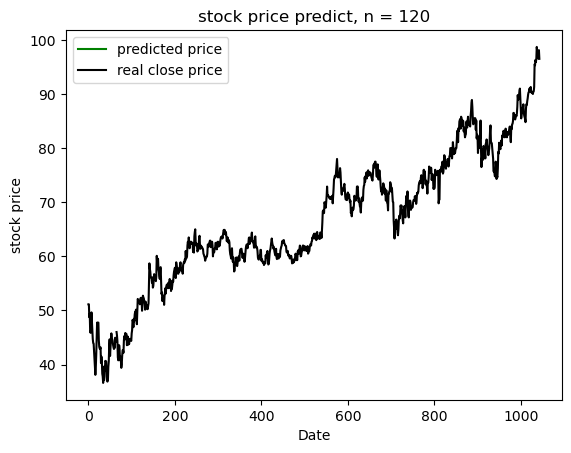

In [47]:
# plt.plot(test_data['Open'].values, color='black', label = "real open price")
plt.plot(predicted_stock_price, color='green', label = "predicted price")
plt.plot(test_data['Close'].values, color='black', label = "real close price")
plt.title('stock price predict, n = {}'.format(n))
plt.xlabel('Date')
plt.ylabel('stock price')
plt.legend()
plt.show()